# EM-DAT data exploration
<br/> <br/>

### Reading in data

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 

In [127]:
plt.rcParams["figure.figsize"] = (8, 5)

In [165]:
df = pd.read_excel("emdat_public_2022_11_07_query_uid-dvxNk1.xlsx", header=6)
df.head()

/opt/homebrew/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning:

Workbook contains no default style, apply openpyxl's default



,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900-9002-CPV,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.077091,NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.077091,NaN,NaN,NaN,NaN
2,1902-0012-GTM,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,NaN,NaN,NaN,25000.0,781207.0,3.200175,NaN,NaN,NaN,NaN
3,1902-0003-GTM,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,...,NaN,NaN,NaN,NaN,NaN,3.200175,NaN,NaN,NaN,NaN
4,1902-0010-GTM,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,...,NaN,NaN,NaN,NaN,NaN,3.200175,NaN,NaN,NaN,NaN


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16457 entries, 0 to 16456
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Dis No                                     16457 non-null  object 
 1   Year                                       16457 non-null  int64  
 2   Seq                                        16457 non-null  int64  
 3   Glide                                      1703 non-null   object 
 4   Disaster Group                             16457 non-null  object 
 5   Disaster Subgroup                          16457 non-null  object 
 6   Disaster Type                              16457 non-null  object 
 7   Disaster Subtype                           13195 non-null  object 
 8   Disaster Subsubtype                        1103 non-null   object 
 9   Event Name                                 3962 non-null   object 
 10  Country               

In [167]:
df.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damages ('000 US$)', 'Insured Damages, Adjusted ('000 US$)',
       'Total Damages ('000 US$)', 'Total Damages, Adjusted ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

# Data Exploration - disaster types and counts

In [168]:
df["Country"].value_counts()

United States of America (the)    1117
China                              994
India                              758
Philippines (the)                  679
Indonesia                          598
                                  ... 
Saint Barthélemy                     1
Equatorial Guinea                    1
Saint Martin (French Part)           1
Isle of Man                          1
United Arab Emirates (the)           1
Name: Country, Length: 228, dtype: int64

In [169]:
df["Disaster Type"].value_counts()

Flood                    5728
Storm                    4576
Earthquake               1576
Epidemic                 1519
Drought                   792
Landslide                 788
Extreme temperature       607
Wildfire                  453
Volcanic activity         269
Insect infestation         95
Mass movement (dry)        48
Glacial lake outburst       3
Animal accident             1
Fog                         1
Impact                      1
Name: Disaster Type, dtype: int64

In [170]:
df["Disaster Type"].isna().sum()

0

In [171]:
df["Disaster Type"].describe()

count     16457
unique       15
top       Flood
freq       5728
Name: Disaster Type, dtype: object

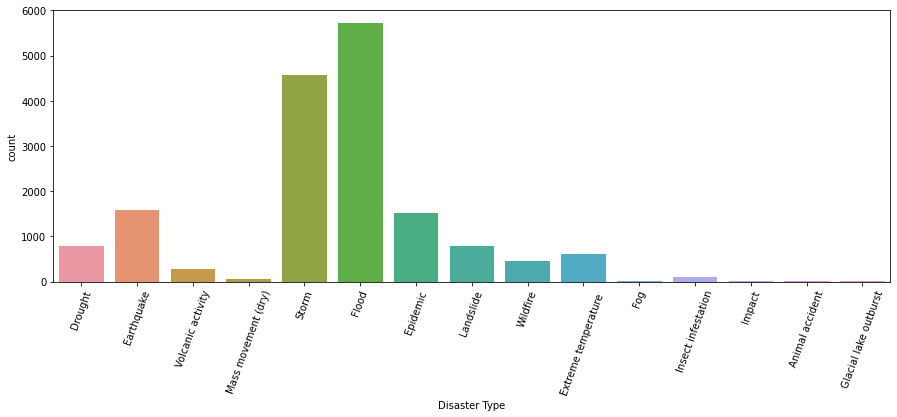

In [172]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=df, x=df["Disaster Type"])
plt.xticks(rotation = 70)
plt.show()

# Data Cleaning

In [184]:
# Pick out relevant columns
df_cols_reduced = df[[
    "Dis No", "Year", "Disaster Type", "Disaster Subtype", "Country", "ISO", "Region", "Continent",
    "Start Year", "Start Month", "End Year", "End Month",
    "Total Deaths", "No Injured", "No Affected", "No Homeless", "Total Affected"
]]

df_cols_reduced.head()

,Dis No,Year,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,Start Year,Start Month,End Year,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected
0,1900-9002-CPV,1900,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,1900,NaN,1900,NaN,11000.0,NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,Drought,Drought,India,IND,Southern Asia,Asia,1900,NaN,1900,NaN,1250000.0,NaN,NaN,NaN,NaN
2,1902-0012-GTM,1902,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,1902,4.0,1902,4.0,2000.0,NaN,NaN,NaN,NaN
3,1902-0003-GTM,1902,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,1902,4.0,1902,4.0,1000.0,NaN,NaN,NaN,NaN
4,1902-0010-GTM,1902,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,1902,10.0,1902,10.0,6000.0,NaN,NaN,NaN,NaN


In [185]:
# Check for missing values (most importantly whether there are any in the columns we will use for visualization
# i.e Country, ISO, Disaster Type)
# Conclusion: the most important columns have no missing values
df_cols_reduced.isna().sum()

Dis No                  0
Year                    0
Disaster Type           0
Disaster Subtype     3262
Country                 0
ISO                     0
Region                  0
Continent               0
Start Year              0
Start Month           389
End Year                0
End Month             702
Total Deaths         4738
No Injured          12385
No Affected          6918
No Homeless         14000
Total Affected       4473
dtype: int64

In [186]:
# Remove rows with disasters that are not relevant to our Fire vs Flood visualization 
# (i.e anything other than Flood, Wildfire and Drought)
relevant_disasters = ["Flood", "Wildfire", "Drought"]
df_rows_reduced = df_cols_reduced[df_cols_reduced["Disaster Type"].isin(relevant_disasters)]
df_rows_reduced.head()

,Dis No,Year,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,Start Year,Start Month,End Year,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected
0,1900-9002-CPV,1900,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,1900,NaN,1900,NaN,11000.0,NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,Drought,Drought,India,IND,Southern Asia,Asia,1900,NaN,1900,NaN,1250000.0,NaN,NaN,NaN,NaN
12,1906-0023-BEL,1906,Flood,NaN,Belgium,BEL,Western Europe,Europe,1906,5.0,1906,5.0,6.0,NaN,NaN,NaN,NaN
13,1906-0024-BEL,1906,Flood,NaN,Belgium,BEL,Western Europe,Europe,1906,4.0,1906,4.0,NaN,NaN,NaN,NaN,NaN
24,1910-9006-BFA,1910,Drought,Drought,Burkina Faso,BFA,Western Africa,Africa,1910,NaN,1914,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
df_rows_reduced["Disaster Type"].value_counts()

Flood       5728
Drought      792
Wildfire     453
Name: Disaster Type, dtype: int64

In [188]:
# Creating the dataframe to be used for futher processing
df_updated = df_rows_reduced
df_updated.head()

,Dis No,Year,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,Start Year,Start Month,End Year,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected
0,1900-9002-CPV,1900,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,1900,NaN,1900,NaN,11000.0,NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,Drought,Drought,India,IND,Southern Asia,Asia,1900,NaN,1900,NaN,1250000.0,NaN,NaN,NaN,NaN
12,1906-0023-BEL,1906,Flood,NaN,Belgium,BEL,Western Europe,Europe,1906,5.0,1906,5.0,6.0,NaN,NaN,NaN,NaN
13,1906-0024-BEL,1906,Flood,NaN,Belgium,BEL,Western Europe,Europe,1906,4.0,1906,4.0,NaN,NaN,NaN,NaN,NaN
24,1910-9006-BFA,1910,Drought,Drought,Burkina Faso,BFA,Western Africa,Africa,1910,NaN,1914,NaN,NaN,NaN,NaN,NaN,NaN


# Data Processing

#### Count the number of disasters by country

In [189]:
# Filter out a few (recent) years for analysis
chosen_years = [2018, 2019, 2020, 2021, 2022]
df_updated = df_updated[df_updated["Year"].isin(chosen_years)]
df_updated.head()

,Dis No,Year,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,Start Year,Start Month,End Year,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected
13953,2018-0082-ALB,2018,Flood,NaN,Albania,ALB,Southern Europe,Europe,2018,3.0,2018,3.0,NaN,NaN,800.0,NaN,800.0
13954,2018-0040-BRA,2018,Flood,NaN,Brazil,BRA,South America,Americas,2018,2.0,2018,2.0,4.0,NaN,250.0,NaN,250.0
13956,2018-0203-BGD,2018,Flood,NaN,Bangladesh,BGD,Southern Asia,Asia,2018,6.0,2018,6.0,14.0,NaN,NaN,NaN,NaN
13957,2018-0062-BOL,2018,Flood,Flash flood,Bolivia (Plurinational State of),BOL,South America,Americas,2018,2.0,2018,2.0,6.0,186.0,12000.0,NaN,12186.0
13958,2018-0396-COL,2018,Flood,NaN,Colombia,COL,South America,Americas,2018,10.0,2018,10.0,12.0,NaN,60000.0,NaN,60000.0


In [190]:
df_updated["Year"].value_counts()

2021    259
2019    224
2020    221
2022    167
2018    155
Name: Year, dtype: int64

#### Introducing an idea we came up with: a comparison scale for disasters to allow us compare floods vs drought & wildfires 
Floods are marked with -1 while drought & wildfires are marked with +1. Later, when each country's data is summed up, it will allow us to see, at a glance, whether floods or drought & wildfires are more prevalent in a country in a given year

In [191]:
# Trying out the use of a scale: -1 for Flood and 1 for Wildfire/Drought
df_updated["Disaster Comparison Scale"] = df_updated["Disaster Type"].apply(lambda x: -1 if x=="Flood" else 1)
df_updated.head()

/var/folders/32/t8k4f_4d55nds458_sr5k_d80000gn/T/ipykernel_29562/2715338329.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Dis No,Year,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,Start Year,Start Month,End Year,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Disaster Comparison Scale
13953,2018-0082-ALB,2018,Flood,NaN,Albania,ALB,Southern Europe,Europe,2018,3.0,2018,3.0,NaN,NaN,800.0,NaN,800.0,-1
13954,2018-0040-BRA,2018,Flood,NaN,Brazil,BRA,South America,Americas,2018,2.0,2018,2.0,4.0,NaN,250.0,NaN,250.0,-1
13956,2018-0203-BGD,2018,Flood,NaN,Bangladesh,BGD,Southern Asia,Asia,2018,6.0,2018,6.0,14.0,NaN,NaN,NaN,NaN,-1
13957,2018-0062-BOL,2018,Flood,Flash flood,Bolivia (Plurinational State of),BOL,South America,Americas,2018,2.0,2018,2.0,6.0,186.0,12000.0,NaN,12186.0,-1
13958,2018-0396-COL,2018,Flood,NaN,Colombia,COL,South America,Americas,2018,10.0,2018,10.0,12.0,NaN,60000.0,NaN,60000.0,-1


#### Grouping data by country

In [212]:
group_by_object = df_updated.groupby(["Country"], sort=False)
group_by_object

In [215]:
df_aggregated = group_by_object.agg("sum")
df_aggregated

,Year,Start Year,Start Month,End Year,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Disaster Comparison Scale
Country,,,,,,,,,,,
Albania,4039,4039,4.0,4039,4.0,0.0,0.0,884.0,0.0,884.0,-2
Brazil,66673,66673,133.0,66674,156.0,745.0,3005.0,11845274.0,5886.0,11854165.0,-27
Bangladesh,12118,12118,35.0,12118,41.0,509.0,0.0,20531015.0,0.0,20531015.0,-6
Bolivia (Plurinational State of),30304,30304,52.0,30305,53.0,207.0,204.0,1239730.0,0.0,1239934.0,-11
Colombia,56577,56577,184.0,56577,192.0,182.0,70.0,409226.0,215.0,409511.0,-28
...,...,...,...,...,...,...,...,...,...,...,...
Suriname,4043,4043,7.0,4043,11.0,0.0,0.0,19100.0,0.0,19100.0,-2
Slovenia,2021,2021,9.0,2021,9.0,0.0,0.0,1500.0,0.0,1500.0,-1
Tuvalu,2021,2021,1.0,2021,6.0,0.0,0.0,10204.0,0.0,10204.0,1


In [216]:
df_aggregated.loc["Australia"]["Disaster Comparison Scale"]

-8.0

In [217]:
country = "Australia"
country_data = gb.get_group(country)["Disaster Type"].value_counts()
print(country_data)

Flood       12
Wildfire     3
Drought      1
Name: Disaster Type, dtype: int64


In [218]:
# quick check through distaster ocurrence counts for all countries
for country_name, country_df in gb:
    print(f"{country_name}:") 
    print(f"{country_df['Disaster Type'].value_counts()}")
    # break

Albania:
Flood    2
Name: Disaster Type, dtype: int64
Brazil:
Flood       30
Drought      2
Wildfire     1
Name: Disaster Type, dtype: int64
Bangladesh:
Flood    6
Name: Disaster Type, dtype: int64
Bolivia (Plurinational State of):
Flood       13
Wildfire     2
Name: Disaster Type, dtype: int64
Colombia:
Flood    28
Name: Disaster Type, dtype: int64
Costa Rica:
Flood      2
Drought    1
Name: Disaster Type, dtype: int64
Guatemala:
Flood      8
Drought    1
Name: Disaster Type, dtype: int64
Ghana:
Flood    8
Name: Disaster Type, dtype: int64
Canada:
Flood       6
Wildfire    2
Name: Disaster Type, dtype: int64
Argentina:
Flood       8
Wildfire    2
Drought     2
Name: Disaster Type, dtype: int64
China:
Flood       27
Wildfire     2
Drought      2
Name: Disaster Type, dtype: int64
Greece:
Wildfire    3
Flood       2
Name: Disaster Type, dtype: int64
Afghanistan:
Flood      20
Drought     2
Name: Disaster Type, dtype: int64
Angola:
Flood      8
Drought    1
Name: Disaster Type, dtype: int

#### Extract the disaster comparison scale

In [219]:
comparison_scale = df_aggregated["Disaster Comparison Scale"]
comparison_scale

Country
Albania                             -2
Brazil                             -27
Bangladesh                          -6
Bolivia (Plurinational State of)   -11
Colombia                           -28
                                    ..
Suriname                            -2
Slovenia                            -1
Tuvalu                               1
Gambia (the)                        -1
Cuba                                -1
Name: Disaster Comparison Scale, Length: 146, dtype: int64

In [220]:
comparison_scale.value_counts()

-1     35
-2     20
-4     16
 1     10
-3      8
-5      8
-7      6
 0      5
-8      5
-6      4
-10     4
-9      3
-11     3
-13     3
-15     3
-14     2
-18     1
-22     1
-23     1
-16     1
-27     1
-28     1
-29     1
-67     1
-12     1
 2      1
 3      1
Name: Disaster Comparison Scale, dtype: int64

#### It seems that most countries have more floods than drought/wildfires. Extracting the countries that have more drought/wildfires to see which ones they are

In [221]:
df_aggregated[df_aggregated["Disaster Comparison Scale"] > 0]

,Year,Start Year,Start Month,End Year,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Disaster Comparison Scale
Country,,,,,,,,,,,
Greece,10101,10101,40.0,10101,41.0,110.0,1100.0,67288.0,0.0,68388.0,1
Latvia,2018,2018,7.0,2018,7.0,0.0,0.0,0.0,0.0,0.0,1
Portugal,6062,6062,22.0,6062,23.0,3.0,266.0,250.0,0.0,516.0,3
Lithuania,2018,2018,5.0,2018,6.0,0.0,0.0,0.0,0.0,0.0,1
Cyprus,2021,2021,7.0,2021,7.0,4.0,0.0,150.0,0.0,150.0,1
Lesotho,4039,4039,9.0,4039,23.0,0.0,0.0,1199000.0,0.0,1199000.0,2
Lebanon,2020,2020,10.0,2020,10.0,0.0,0.0,0.0,0.0,0.0,1
Macedonia (the former Yugoslav Republic of),2021,2021,7.0,2021,9.0,1.0,0.0,80000.0,0.0,80000.0,1
Marshall Islands (the),2022,2022,1.0,2022,3.0,0.0,0.0,9326.0,0.0,9326.0,1


# Data Visualization

### Choropleth Map - testing

In [156]:
fig = go.Figure(data=go.Choropleth(
    locations = df["ISO"],
    z = df["Total Affected"],
    text = df["Country"],
    colorscale = "earth",
    autocolorscale=False,
    reversescale=True,
    marker_line_color="darkgray",
    marker_line_width=0.5,
    colorbar_title = "Fire vs Flood",
))

fig.update_layout(
    title_text="Fire vs Flood",
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()